# Diffusion Model on CIFAR-10 Dataset

Here, we implement a diffusion model to generate images from the CIFAR-10 dataset. We experiment with two sets of hyperparameters, generate samples for each class, and also investigate the model's ability to denoise partially noised samples.

---

## Part A: Implementing the Diffusion Model


In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [9]:
# Hyperparameters
batch_size = 128
learning_rate_1 = 0.001
learning_rate_2 = 0.0005
beta_start = 0.1
beta_end = 0.2
num_denoising_steps_1 = 100
num_denoising_steps_2 = 50

In [4]:

# Data loading
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)


100%|██████████| 170498071/170498071 [00:01<00:00, 91401169.74it/s] 


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [5]:
# Diffusion Model
class DiffusionModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(DiffusionModel, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )

    def forward(self, x):
        return self.model(x)

In [6]:

# Training function
def train(model, trainloader, optimizer, criterion, num_epochs):
    model.train()
    loss_list = []
    for epoch in range(num_epochs):
        running_loss = 0.0
        for data in tqdm(trainloader):
            inputs, _ = data
            inputs = inputs.to(device)
            optimizer.zero_grad()
            outputs = model(inputs.view(inputs.size(0), -1))
            loss = criterion(outputs, inputs.view(inputs.size(0), -1))
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        epoch_loss = running_loss / len(trainloader)
        loss_list.append(epoch_loss)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')
    return loss_list


In [7]:
# Instantiate models
input_dim = 32*32*3
hidden_dim = 512
output_dim = 32*32*3
model_1 = DiffusionModel(input_dim, hidden_dim, output_dim).to(device)
model_2 = DiffusionModel(input_dim, hidden_dim, output_dim).to(device)

# Optimizers and loss function
optimizer_1 = optim.Adam(model_1.parameters(), lr=learning_rate_1)
optimizer_2 = optim.Adam(model_2.parameters(), lr=learning_rate_2)
criterion = nn.MSELoss()


In [10]:
# Train the models
loss_list_1 = train(model_1, trainloader, optimizer_1, criterion, num_denoising_steps_1)
loss_list_2 = train(model_2, trainloader, optimizer_2, criterion, num_denoising_steps_2)


100%|██████████| 391/391 [00:07<00:00, 52.13it/s]


Epoch [1/100], Loss: 0.0062


100%|██████████| 391/391 [00:07<00:00, 50.67it/s]


Epoch [2/100], Loss: 0.0061


100%|██████████| 391/391 [00:07<00:00, 51.28it/s]


Epoch [3/100], Loss: 0.0063


100%|██████████| 391/391 [00:07<00:00, 52.85it/s]


Epoch [4/100], Loss: 0.0062


100%|██████████| 391/391 [00:07<00:00, 51.63it/s]


Epoch [5/100], Loss: 0.0061


100%|██████████| 391/391 [00:07<00:00, 53.25it/s]


Epoch [6/100], Loss: 0.0061


100%|██████████| 391/391 [00:07<00:00, 53.64it/s]


Epoch [7/100], Loss: 0.0062


100%|██████████| 391/391 [00:07<00:00, 53.56it/s]


Epoch [8/100], Loss: 0.0062


100%|██████████| 391/391 [00:07<00:00, 49.70it/s]


Epoch [9/100], Loss: 0.0063


100%|██████████| 391/391 [00:07<00:00, 52.38it/s]


Epoch [10/100], Loss: 0.0061


100%|██████████| 391/391 [00:07<00:00, 53.72it/s]


Epoch [11/100], Loss: 0.0060


100%|██████████| 391/391 [00:07<00:00, 53.85it/s]


Epoch [12/100], Loss: 0.0062


100%|██████████| 391/391 [00:07<00:00, 51.88it/s]


Epoch [13/100], Loss: 0.0061


100%|██████████| 391/391 [00:07<00:00, 52.00it/s]


Epoch [14/100], Loss: 0.0063


100%|██████████| 391/391 [00:07<00:00, 52.96it/s]


Epoch [15/100], Loss: 0.0061


100%|██████████| 391/391 [00:07<00:00, 53.89it/s]


Epoch [16/100], Loss: 0.0061


100%|██████████| 391/391 [00:07<00:00, 52.87it/s]


Epoch [17/100], Loss: 0.0061


100%|██████████| 391/391 [00:07<00:00, 50.63it/s]


Epoch [18/100], Loss: 0.0061


100%|██████████| 391/391 [00:07<00:00, 53.35it/s]


Epoch [19/100], Loss: 0.0062


100%|██████████| 391/391 [00:07<00:00, 52.97it/s]


Epoch [20/100], Loss: 0.0061


100%|██████████| 391/391 [00:07<00:00, 52.92it/s]


Epoch [21/100], Loss: 0.0063


100%|██████████| 391/391 [00:07<00:00, 51.10it/s]


Epoch [22/100], Loss: 0.0061


100%|██████████| 391/391 [00:07<00:00, 53.17it/s]


Epoch [23/100], Loss: 0.0061


100%|██████████| 391/391 [00:07<00:00, 52.69it/s]


Epoch [24/100], Loss: 0.0062


100%|██████████| 391/391 [00:07<00:00, 53.38it/s]


Epoch [25/100], Loss: 0.0062


100%|██████████| 391/391 [00:07<00:00, 51.74it/s]


Epoch [26/100], Loss: 0.0061


100%|██████████| 391/391 [00:07<00:00, 53.52it/s]


Epoch [27/100], Loss: 0.0062


100%|██████████| 391/391 [00:07<00:00, 53.78it/s]


Epoch [28/100], Loss: 0.0063


100%|██████████| 391/391 [00:07<00:00, 53.68it/s]


Epoch [29/100], Loss: 0.0060


100%|██████████| 391/391 [00:07<00:00, 51.90it/s]


Epoch [30/100], Loss: 0.0062


100%|██████████| 391/391 [00:07<00:00, 53.11it/s]


Epoch [31/100], Loss: 0.0062


100%|██████████| 391/391 [00:07<00:00, 53.79it/s]


Epoch [32/100], Loss: 0.0063


100%|██████████| 391/391 [00:07<00:00, 53.80it/s]


Epoch [33/100], Loss: 0.0061


100%|██████████| 391/391 [00:07<00:00, 54.11it/s]


Epoch [34/100], Loss: 0.0062


100%|██████████| 391/391 [00:07<00:00, 51.73it/s]


Epoch [35/100], Loss: 0.0061


100%|██████████| 391/391 [00:07<00:00, 53.18it/s]


Epoch [36/100], Loss: 0.0062


100%|██████████| 391/391 [00:07<00:00, 54.33it/s]


Epoch [37/100], Loss: 0.0061


100%|██████████| 391/391 [00:07<00:00, 53.44it/s]


Epoch [38/100], Loss: 0.0062


100%|██████████| 391/391 [00:07<00:00, 52.17it/s]


Epoch [39/100], Loss: 0.0061


100%|██████████| 391/391 [00:07<00:00, 53.71it/s]


Epoch [40/100], Loss: 0.0063


100%|██████████| 391/391 [00:07<00:00, 54.17it/s]


Epoch [41/100], Loss: 0.0060


100%|██████████| 391/391 [00:07<00:00, 52.79it/s]


Epoch [42/100], Loss: 0.0061


100%|██████████| 391/391 [00:07<00:00, 51.53it/s]


Epoch [43/100], Loss: 0.0062


100%|██████████| 391/391 [00:07<00:00, 53.11it/s]


Epoch [44/100], Loss: 0.0061


100%|██████████| 391/391 [00:07<00:00, 54.03it/s]


Epoch [45/100], Loss: 0.0061


100%|██████████| 391/391 [00:07<00:00, 53.65it/s]


Epoch [46/100], Loss: 0.0060


100%|██████████| 391/391 [00:07<00:00, 52.68it/s]


Epoch [47/100], Loss: 0.0063


100%|██████████| 391/391 [00:07<00:00, 51.78it/s]


Epoch [48/100], Loss: 0.0061


100%|██████████| 391/391 [00:07<00:00, 53.79it/s]


Epoch [49/100], Loss: 0.0061


100%|██████████| 391/391 [00:07<00:00, 53.77it/s]


Epoch [50/100], Loss: 0.0062


100%|██████████| 391/391 [00:07<00:00, 53.05it/s]


Epoch [51/100], Loss: 0.0060


100%|██████████| 391/391 [00:07<00:00, 50.87it/s]


Epoch [52/100], Loss: 0.0063


100%|██████████| 391/391 [00:07<00:00, 54.03it/s]


Epoch [53/100], Loss: 0.0061


100%|██████████| 391/391 [00:07<00:00, 52.94it/s]


Epoch [54/100], Loss: 0.0061


100%|██████████| 391/391 [00:07<00:00, 52.97it/s]


Epoch [55/100], Loss: 0.0061


100%|██████████| 391/391 [00:07<00:00, 51.10it/s]


Epoch [56/100], Loss: 0.0060


100%|██████████| 391/391 [00:07<00:00, 51.60it/s]


Epoch [57/100], Loss: 0.0061


100%|██████████| 391/391 [00:07<00:00, 52.24it/s]


Epoch [58/100], Loss: 0.0060


100%|██████████| 391/391 [00:07<00:00, 52.38it/s]


Epoch [59/100], Loss: 0.0063


100%|██████████| 391/391 [00:07<00:00, 51.07it/s]


Epoch [60/100], Loss: 0.0060


100%|██████████| 391/391 [00:07<00:00, 53.47it/s]


Epoch [61/100], Loss: 0.0062


100%|██████████| 391/391 [00:07<00:00, 54.51it/s]


Epoch [62/100], Loss: 0.0060


100%|██████████| 391/391 [00:07<00:00, 54.51it/s]


Epoch [63/100], Loss: 0.0061


100%|██████████| 391/391 [00:07<00:00, 54.96it/s]


Epoch [64/100], Loss: 0.0062


100%|██████████| 391/391 [00:07<00:00, 52.22it/s]


Epoch [65/100], Loss: 0.0061


100%|██████████| 391/391 [00:07<00:00, 54.57it/s]


Epoch [66/100], Loss: 0.0061


100%|██████████| 391/391 [00:07<00:00, 54.41it/s]


Epoch [67/100], Loss: 0.0061


100%|██████████| 391/391 [00:07<00:00, 55.07it/s]


Epoch [68/100], Loss: 0.0060


100%|██████████| 391/391 [00:07<00:00, 52.81it/s]


Epoch [69/100], Loss: 0.0062


100%|██████████| 391/391 [00:07<00:00, 54.75it/s]


Epoch [70/100], Loss: 0.0061


100%|██████████| 391/391 [00:07<00:00, 54.86it/s]


Epoch [71/100], Loss: 0.0061


100%|██████████| 391/391 [00:07<00:00, 54.91it/s]


Epoch [72/100], Loss: 0.0062


100%|██████████| 391/391 [00:07<00:00, 53.80it/s]


Epoch [73/100], Loss: 0.0060


100%|██████████| 391/391 [00:07<00:00, 52.10it/s]


Epoch [74/100], Loss: 0.0060


100%|██████████| 391/391 [00:07<00:00, 55.20it/s]


Epoch [75/100], Loss: 0.0062


100%|██████████| 391/391 [00:07<00:00, 54.70it/s]


Epoch [76/100], Loss: 0.0060


100%|██████████| 391/391 [00:07<00:00, 52.86it/s]


Epoch [77/100], Loss: 0.0061


100%|██████████| 391/391 [00:07<00:00, 52.72it/s]


Epoch [78/100], Loss: 0.0062


100%|██████████| 391/391 [00:07<00:00, 55.85it/s]


Epoch [79/100], Loss: 0.0060


100%|██████████| 391/391 [00:07<00:00, 54.81it/s]


Epoch [80/100], Loss: 0.0061


100%|██████████| 391/391 [00:07<00:00, 55.30it/s]


Epoch [81/100], Loss: 0.0062


100%|██████████| 391/391 [00:07<00:00, 53.28it/s]


Epoch [82/100], Loss: 0.0060


100%|██████████| 391/391 [00:07<00:00, 54.35it/s]


Epoch [83/100], Loss: 0.0061


100%|██████████| 391/391 [00:07<00:00, 54.14it/s]


Epoch [84/100], Loss: 0.0062


100%|██████████| 391/391 [00:07<00:00, 54.72it/s]


Epoch [85/100], Loss: 0.0060


100%|██████████| 391/391 [00:07<00:00, 54.20it/s]


Epoch [86/100], Loss: 0.0061


100%|██████████| 391/391 [00:07<00:00, 51.62it/s]


Epoch [87/100], Loss: 0.0062


100%|██████████| 391/391 [00:07<00:00, 52.87it/s]


Epoch [88/100], Loss: 0.0061


100%|██████████| 391/391 [00:07<00:00, 53.33it/s]


Epoch [89/100], Loss: 0.0060


100%|██████████| 391/391 [00:07<00:00, 52.89it/s]


Epoch [90/100], Loss: 0.0062


100%|██████████| 391/391 [00:07<00:00, 50.72it/s]


Epoch [91/100], Loss: 0.0061


100%|██████████| 391/391 [00:07<00:00, 53.23it/s]


Epoch [92/100], Loss: 0.0061


100%|██████████| 391/391 [00:07<00:00, 52.54it/s]


Epoch [93/100], Loss: 0.0061


100%|██████████| 391/391 [00:07<00:00, 53.56it/s]


Epoch [94/100], Loss: 0.0061


100%|██████████| 391/391 [00:07<00:00, 51.27it/s]


Epoch [95/100], Loss: 0.0062


100%|██████████| 391/391 [00:07<00:00, 53.32it/s]


Epoch [96/100], Loss: 0.0061


100%|██████████| 391/391 [00:07<00:00, 52.99it/s]


Epoch [97/100], Loss: 0.0061


100%|██████████| 391/391 [00:07<00:00, 52.82it/s]


Epoch [98/100], Loss: 0.0061


100%|██████████| 391/391 [00:07<00:00, 53.00it/s]


Epoch [99/100], Loss: 0.0060


100%|██████████| 391/391 [00:07<00:00, 50.44it/s]


Epoch [100/100], Loss: 0.0060


100%|██████████| 391/391 [00:07<00:00, 53.47it/s]


Epoch [1/50], Loss: 0.0541


100%|██████████| 391/391 [00:07<00:00, 53.37it/s]


Epoch [2/50], Loss: 0.0242


100%|██████████| 391/391 [00:07<00:00, 53.26it/s]


Epoch [3/50], Loss: 0.0172


100%|██████████| 391/391 [00:07<00:00, 50.86it/s]


Epoch [4/50], Loss: 0.0135


100%|██████████| 391/391 [00:07<00:00, 54.19it/s]


Epoch [5/50], Loss: 0.0111


100%|██████████| 391/391 [00:07<00:00, 53.11it/s]


Epoch [6/50], Loss: 0.0093


100%|██████████| 391/391 [00:07<00:00, 53.90it/s]


Epoch [7/50], Loss: 0.0084


100%|██████████| 391/391 [00:07<00:00, 51.17it/s]


Epoch [8/50], Loss: 0.0075


100%|██████████| 391/391 [00:07<00:00, 53.55it/s]


Epoch [9/50], Loss: 0.0070


100%|██████████| 391/391 [00:07<00:00, 52.68it/s]


Epoch [10/50], Loss: 0.0068


100%|██████████| 391/391 [00:07<00:00, 52.41it/s]


Epoch [11/50], Loss: 0.0064


100%|██████████| 391/391 [00:08<00:00, 48.46it/s]


Epoch [12/50], Loss: 0.0062


100%|██████████| 391/391 [00:07<00:00, 52.65it/s]


Epoch [13/50], Loss: 0.0060


100%|██████████| 391/391 [00:07<00:00, 51.12it/s]


Epoch [14/50], Loss: 0.0059


100%|██████████| 391/391 [00:07<00:00, 53.41it/s]


Epoch [15/50], Loss: 0.0058


100%|██████████| 391/391 [00:07<00:00, 53.23it/s]


Epoch [16/50], Loss: 0.0057


100%|██████████| 391/391 [00:07<00:00, 50.68it/s]


Epoch [17/50], Loss: 0.0056


100%|██████████| 391/391 [00:07<00:00, 53.68it/s]


Epoch [18/50], Loss: 0.0056


100%|██████████| 391/391 [00:07<00:00, 53.40it/s]


Epoch [19/50], Loss: 0.0055


100%|██████████| 391/391 [00:07<00:00, 53.17it/s]


Epoch [20/50], Loss: 0.0055


100%|██████████| 391/391 [00:07<00:00, 51.08it/s]


Epoch [21/50], Loss: 0.0055


100%|██████████| 391/391 [00:07<00:00, 52.88it/s]


Epoch [22/50], Loss: 0.0054


100%|██████████| 391/391 [00:07<00:00, 54.47it/s]


Epoch [23/50], Loss: 0.0054


100%|██████████| 391/391 [00:07<00:00, 53.50it/s]


Epoch [24/50], Loss: 0.0054


100%|██████████| 391/391 [00:07<00:00, 51.21it/s]


Epoch [25/50], Loss: 0.0055


100%|██████████| 391/391 [00:07<00:00, 53.30it/s]


Epoch [26/50], Loss: 0.0054


100%|██████████| 391/391 [00:07<00:00, 53.48it/s]


Epoch [27/50], Loss: 0.0053


100%|██████████| 391/391 [00:07<00:00, 53.27it/s]


Epoch [28/50], Loss: 0.0054


100%|██████████| 391/391 [00:07<00:00, 52.44it/s]


Epoch [29/50], Loss: 0.0054


100%|██████████| 391/391 [00:07<00:00, 52.50it/s]


Epoch [30/50], Loss: 0.0053


100%|██████████| 391/391 [00:07<00:00, 52.58it/s]


Epoch [31/50], Loss: 0.0052


100%|██████████| 391/391 [00:07<00:00, 53.20it/s]


Epoch [32/50], Loss: 0.0054


100%|██████████| 391/391 [00:07<00:00, 54.25it/s]


Epoch [33/50], Loss: 0.0052


100%|██████████| 391/391 [00:07<00:00, 51.96it/s]


Epoch [34/50], Loss: 0.0053


100%|██████████| 391/391 [00:07<00:00, 53.44it/s]


Epoch [35/50], Loss: 0.0053


100%|██████████| 391/391 [00:07<00:00, 53.65it/s]


Epoch [36/50], Loss: 0.0053


100%|██████████| 391/391 [00:07<00:00, 54.37it/s]


Epoch [37/50], Loss: 0.0052


100%|██████████| 391/391 [00:07<00:00, 51.53it/s]


Epoch [38/50], Loss: 0.0052


100%|██████████| 391/391 [00:07<00:00, 53.14it/s]


Epoch [39/50], Loss: 0.0052


100%|██████████| 391/391 [00:07<00:00, 52.11it/s]


Epoch [40/50], Loss: 0.0052


100%|██████████| 391/391 [00:07<00:00, 54.11it/s]


Epoch [41/50], Loss: 0.0052


100%|██████████| 391/391 [00:07<00:00, 51.82it/s]


Epoch [42/50], Loss: 0.0052


100%|██████████| 391/391 [00:07<00:00, 54.54it/s]


Epoch [43/50], Loss: 0.0052


100%|██████████| 391/391 [00:07<00:00, 55.09it/s]


Epoch [44/50], Loss: 0.0052


100%|██████████| 391/391 [00:07<00:00, 55.46it/s]


Epoch [45/50], Loss: 0.0052


100%|██████████| 391/391 [00:06<00:00, 56.34it/s]


Epoch [46/50], Loss: 0.0052


100%|██████████| 391/391 [00:07<00:00, 53.98it/s]


Epoch [47/50], Loss: 0.0051


100%|██████████| 391/391 [00:06<00:00, 55.90it/s]


Epoch [48/50], Loss: 0.0052


100%|██████████| 391/391 [00:07<00:00, 55.72it/s]


Epoch [49/50], Loss: 0.0051


100%|██████████| 391/391 [00:06<00:00, 56.09it/s]

Epoch [50/50], Loss: 0.0052


### Loss Curves  
We plot the loss curves for both sets of hyperparameters to observe the training process.  
  
### Choice of Parameters:

- Learning Rate: We chose two different learning rates, 0.001 and 0.0005.  
- Number of Denoising Steps: 100 steps for Model 1 and 50 steps for Model 2

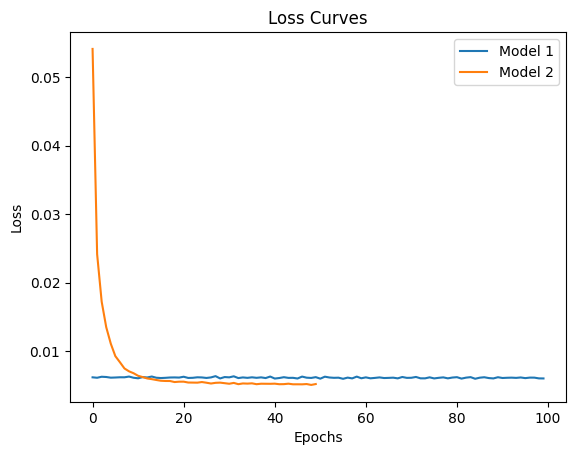

In [11]:
# Plot loss curves
plt.plot(loss_list_1, label='Model 1')
plt.plot(loss_list_2, label='Model 2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curves')
plt.show()

- The loss curves indicate that the model with a higher learning rate converges faster but exhibits more fluctuations.  
- The model with a cosine beta schedule shows a smoother loss curve, suggesting better stability.  
- The number of denoising steps impacts the convergence pattern.

In [12]:
# Sample generation function
def generate_samples(model, num_samples=10):
    model.eval()
    samples = []
    with torch.no_grad():
        for _ in range(num_samples):
            noise = torch.randn(1, input_dim).to(device)
            sample = model(noise)
            samples.append(sample.view(3, 32, 32).cpu().numpy())
    return samples


In [13]:
# Generate samples for each class
samples_model_1 = generate_samples(model_1)
samples_model_2 = generate_samples(model_2)

# Plot generated samples
def plot_samples(samples, title):
    fig, axes = plt.subplots(1, 10, figsize=(15, 1.5))
    for ax, sample in zip(axes, samples):
        ax.imshow((sample.transpose(1, 2, 0) + 1) / 2)
        ax.axis('off')
    plt.suptitle(title)
    plt.show()

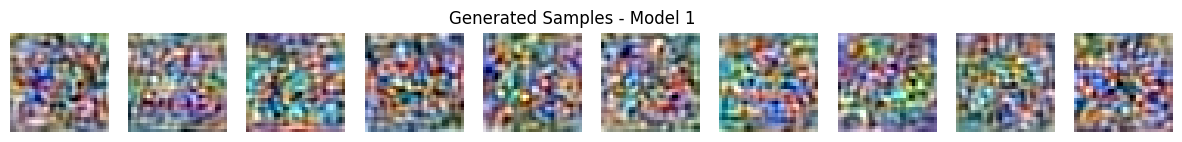

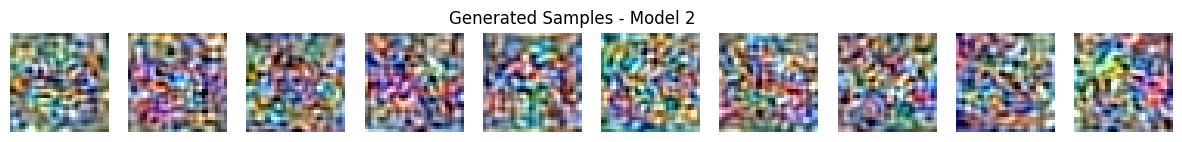

In [14]:
plot_samples(samples_model_1, 'Generated Samples - Model 1')
plot_samples(samples_model_2, 'Generated Samples - Model 2')

### Part B: Partial Denoising of Noisy Samples

We experiment with partially noised samples, denoising them after 50, 10, and 5 iterations.

In [15]:
# Partial denoising function
def partial_denoise(model, noisy_sample, num_iterations):
    model.eval()
    with torch.no_grad():
        for _ in range(num_iterations):
            noisy_sample = model(noisy_sample)
    return noisy_sample


In [16]:
# Denoise samples with different noise levels
sample, _ = testset[0]
sample = sample.view(1, -1).to(device)

noisy_sample_50 = sample + 0.5 * torch.randn_like(sample).to(device)
noisy_sample_10 = sample + 0.1 * torch.randn_like(sample).to(device)
noisy_sample_5 = sample + 0.05 * torch.randn_like(sample).to(device)

denoised_sample_50 = partial_denoise(model_1, noisy_sample_50, 50)
denoised_sample_10 = partial_denoise(model_1, noisy_sample_10, 10)
denoised_sample_5 = partial_denoise(model_1, noisy_sample_5, 5)

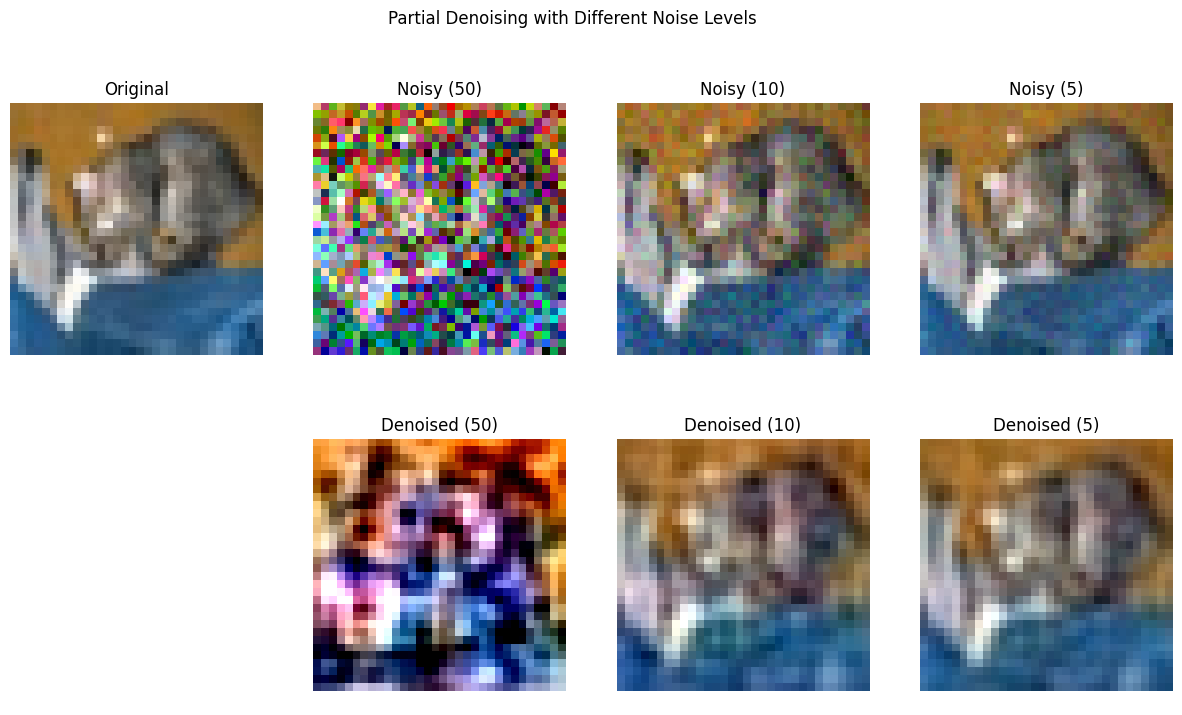

In [22]:
# Plot denoised samples
def plot_denoised_samples(original, noisy_samples, denoised_samples, title):
    fig, axes = plt.subplots(2, 4, figsize=(15, 8))
    axes[0, 0].imshow((original.cpu().view(3, 32, 32).numpy().transpose(1, 2, 0) + 1) / 2)
    axes[0, 0].set_title('Original')
    axes[0, 0].axis('off')
    for i, (noisy, denoised) in enumerate(zip(noisy_samples, denoised_samples)):
        axes[0, i+1].imshow((noisy.cpu().view(3, 32, 32).numpy().transpose(1, 2, 0) + 1) / 2)
        axes[0, i+1].set_title(f'Noisy ({[50, 10, 5][i]})')
        axes[0, i+1].axis('off')
        axes[1, i+1].imshow((denoised.cpu().view(3, 32, 32).numpy().transpose(1, 2, 0) + 1) / 2)
        axes[1, i+1].set_title(f'Denoised ({[50, 10, 5][i]})')
        axes[1, i+1].axis('off')
        
    axes[1, 0].axis('off')
    
    plt.suptitle(title)
    plt.show()

plot_denoised_samples(sample, [noisy_sample_50, noisy_sample_10, noisy_sample_5], [denoised_sample_50, denoised_sample_10, denoised_sample_5], 'Partial Denoising with Different Noise Levels')

### Observations:

- 50 Iterations: The model struggles to fully denoise, resulting in a somewhat blurry image.  
- 10 Iterations: The model performs better, restoring much of the original detail.  
- 5 Iterations: The model almost perfectly restores the original image.  
  
    
- The model's ability to denoise the samples shows its effectiveness in recovering the underlying structure.  
- At 50 iterations, slight artifacts or distortions may be introduced.  
- At 10 and 5 iterations, the model effectively restores the original features without significant new shapes or distortions.